## 1. 데이터 탐색

### 1) 기초 정보 탐색하기
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../../dataset/drinks.csv'
drinks = pd.read_csv(file_path)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [2]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 2) 상관 관계 탐색 및 시각화
----

In [4]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson') 
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [6]:
# !pip install seaborn

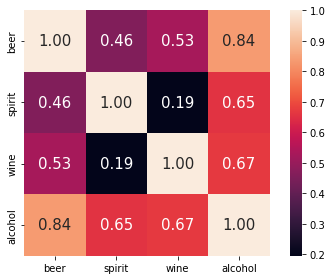

In [7]:
import seaborn as sns

# corr 행렬 히트맵 시각화
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot = True,
                 square = True,
                 fmt = '.2f',
                 annot_kws = {'size': 15}, 
                 yticklabels = cols_view, 
                 xticklabels = cols_view)
plt.tight_layout() 
plt.show()

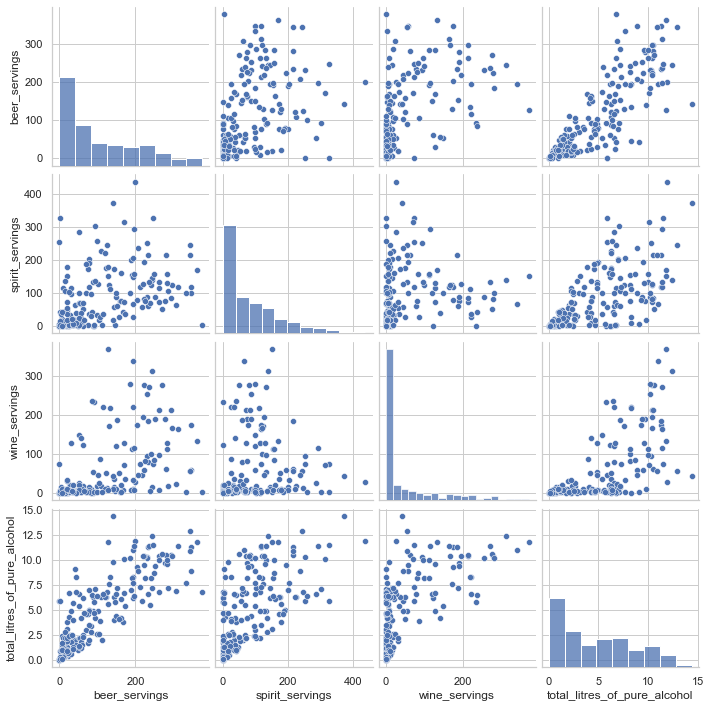

In [8]:
# 피처 간의 산점도 그래프
sns.set(style = 'whitegrid', context = 'notebook') 
sns.pairplot(drinks[['beer_servings', 
                     'spirit_servings', 
                     'wine_servings', 
                     'total_litres_of_pure_alcohol']], 
             height = 2.5)
plt.show()

### 3) 범주형 데이터 전처리 및 시각화
----

In [9]:
drinks[['country', 'continent']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    193 non-null    object
 1   continent  170 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [10]:
drinks['country'].value_counts()

Afghanistan    1
Libya          1
Niger          1
Nigeria        1
Niue           1
              ..
Greece         1
Grenada        1
Guatemala      1
Guinea         1
Zimbabwe       1
Name: country, Length: 193, dtype: int64

In [11]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [12]:
drinks[drinks['continent'].isnull()==True]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
5,Antigua & Barbuda,102,128,45,4.9,NaN
11,Bahamas,122,176,51,6.3,NaN
14,Barbados,143,173,36,6.3,NaN
17,Belize,263,114,8,6.8,NaN
32,Canada,240,122,100,8.2,NaN
41,Costa Rica,149,87,11,4.4,NaN
43,Cuba,93,137,5,4.2,NaN
50,Dominica,52,286,26,6.6,NaN
51,Dominican Republic,193,147,9,6.2,NaN
54,El Salvador,52,69,2,2.2,NaN


In [13]:
drinks['continent'] = drinks['continent'].fillna('OT') 
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


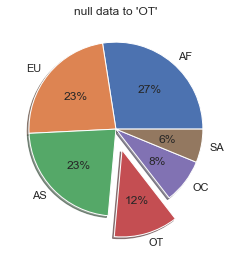

In [14]:
labels = drinks['continent'].value_counts().index.tolist() 
fracs1 = drinks['continent'].value_counts().values.tolist() 
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True) 
plt.title('null data to \'OT\'')
plt.show()

----
## 2. 논리적 분석하기

### 1) 대륙별 소비 알콜 분석하기
----

In [15]:
result = drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'sum']) 
result.head()

,mean,min,max,sum
continent,,,,
AF,61.471698,0,376,3258
AS,37.045455,0,247,1630
EU,193.777778,0,361,8720
OC,89.687500,0,306,1435
OT,145.434783,1,285,3345


In [16]:
result.reset_index().head()

,continent,mean,min,max,sum
0,AF,61.471698,0,376,3258
1,AS,37.045455,0,247,1630
2,EU,193.777778,0,361,8720
3,OC,89.687500,0,306,1435
4,OT,145.434783,1,285,3345


<AxesSubplot:xlabel='continent'>

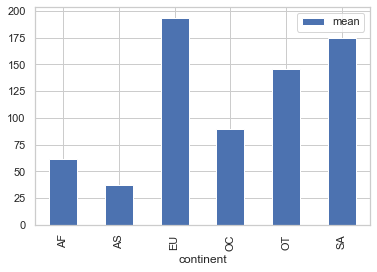

In [17]:
result.reset_index().plot.bar(x='continent', y='mean')

----
### 2) 평균보다 높은 수치를 가진 대륙 분석하기

In [18]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() 
continent_over_mean = continent_mean[continent_mean >= total_mean] 
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [19]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax() 
beer_continent

'EU'

----
## 3. 시각화를 통한 인사이트 발굴
### 1) 대륙별 통계 정보 시각화

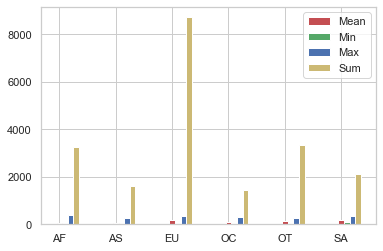

In [20]:
result = drinks.groupby('continent').beer_servings.agg(['mean', 'min', 'max', 'sum']) 
n_groups = len(result.index) 
means = result['mean'].tolist() 
mins = result['min'].tolist() 
maxs = result['max'].tolist() 
sums = result['sum'].tolist()

index = np.arange(n_groups) 
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color = 'r', label = 'Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = 'Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = 'Max') 
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = 'Sum')

plt.xticks(index, result.index.tolist()) 
plt.legend()
plt.show()

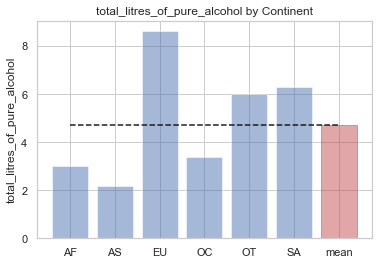

In [21]:
total_mean = drinks['total_litres_of_pure_alcohol'].mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean() 
continents = continent_mean.index.tolist() 
continents.append('mean')
alcohol = continent_mean.values.tolist() 
alcohol.append(total_mean)

bar_list = plt.bar(continents, alcohol, align = 'center', alpha = 0.5) 
bar_list[len(continents) - 1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--") 
plt.ylabel('total_litres_of_pure_alcohol') 
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

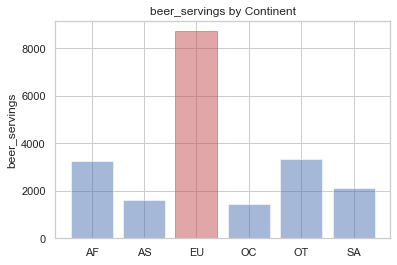

In [22]:
beer_group = drinks.groupby('continent')['beer_servings'].sum() 
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.values.tolist()

bar_list = plt.bar(y_pos, alcohol, align = 'center', alpha = 0.5) 
bar_list[continents.index("EU")].set_color('r') 
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')
plt.show()

----
### 2) 국가별 순위 정보 시각화

In [45]:
country_beer_rank = drinks[['country', 'beer_servings']]
country_beer_rank = country_beer_rank.sort_values(by = ['beer_servings'], ascending = 0) 
country_beer_rank.head()

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343


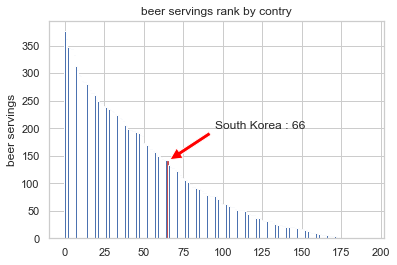

In [68]:
country_list = country_beer_rank['country'].values.tolist() 
x_pos = np.arange(len(country_list))
rank = country_beer_rank['beer_servings'].values.tolist()
korea_rank = country_list.index("South Korea")

bar_list = plt.bar(x_pos, rank) 
bar_list[korea_rank].set_color('r') 
plt.ylabel('beer servings')
plt.title('beer servings rank by contry')
korea_beer_servings = country_beer_rank[country_beer_rank['country'] == 'South Korea'][
    'beer_servings'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_beer_servings), 
             xytext=(korea_rank + 30, korea_beer_servings + 60), 
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [47]:
country_spirit_rank = drinks[['country', 'spirit_servings']]
country_spirit_rank = country_spirit_rank.sort_values(by = ['spirit_servings'], ascending = 0) 
country_spirit_rank.head()

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315


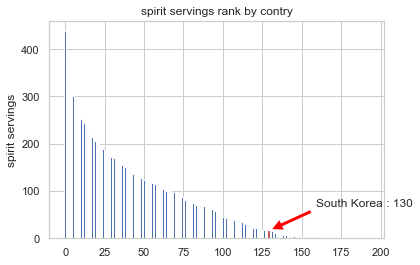

In [69]:
country_list = country_spirit_rank['country'].values.tolist() 
x_pos = np.arange(len(country_list))
rank = country_spirit_rank['spirit_servings'].values.tolist()
korea_rank = country_list.index("South Korea")

bar_list = plt.bar(x_pos, rank) 
bar_list[korea_rank].set_color('r') 
plt.ylabel('spirit servings')
plt.title('spirit servings rank by contry')
korea_spirit_servings = country_spirit_rank[country_spirit_rank['country'] == 'South Korea'][
    'spirit_servings'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_spirit_servings), 
             xytext=(korea_rank + 30, korea_spirit_servings + 50), 
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [49]:
country_wine_rank = drinks[['country', 'wine_servings']]
country_wine_rank = country_wine_rank.sort_values(by = ['wine_servings'], ascending = 0) 
country_wine_rank.head()

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278


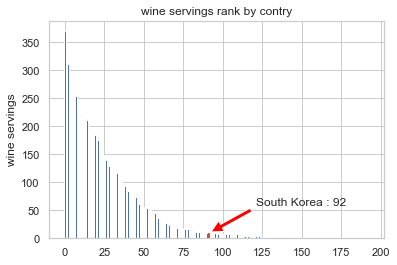

In [60]:
country_list = country_wine_rank['country'].values.tolist() 
x_pos = np.arange(len(country_list))
rank = country_wine_rank['wine_servings'].values.tolist()
korea_rank = country_list.index("South Korea")

bar_list = plt.bar(x_pos, rank) 
bar_list[korea_rank].set_color('r') 
plt.ylabel('wine servings')
plt.title('wine servings rank by contry')
korea_wine_servings = country_wine_rank[country_wine_rank['country'] == 'South Korea'][
    'wine_servings'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_wine_servings), 
             xytext=(korea_rank + 30, korea_wine_servings + 50), 
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [54]:
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

country_alcohol_rank = drinks[['country', 'alcohol_rate']]
country_alcohol_rank = country_alcohol_rank.sort_values(by = ['alcohol_rate'], ascending = 0) 
country_alcohol_rank.head()

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


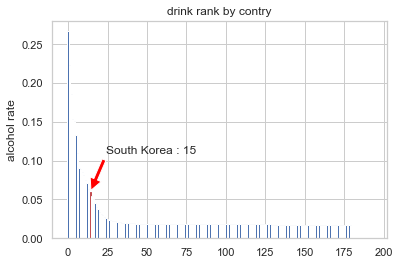

In [55]:
country_list =country_alcohol_rank['country'].values.tolist() 
x_pos = np.arange(len(country_list))
rank = country_alcohol_rank['alcohol_rate'].values.tolist()
korea_rank = country_list.index("South Korea")

bar_list = plt.bar(x_pos, rank)
bar_list[korea_rank].set_color('r') 
plt.ylabel('alcohol rate')
plt.title('drink rank by contry')
korea_alc_rate = country_alcohol_rank[country_alcohol_rank['country'] == 'South Korea'][
    'alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05), 
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

----
## 4. 통계적 분석을 통한 대상 간의 차이 검정

In [23]:
from scipy import stats

africa = drinks.loc[drinks['continent']=='AF'] 
europe = drinks.loc[drinks['continent']=='EU']

tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings']) 
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False) 
print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000
